
# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have used TMDb movies dataset in odreder to complete the data Analysis process of this project.

This data set contains information about 10866 movies collected from The Movie Database (TMDb), including user ratings and revenue. The TMDb containes 21 columns and 10866 tuples. My intrested columns are popularity, revenue, budget, vote_count, runtime, vote_average, relase_year, budget_adj, revenue_adj.


### Questions that can analyised from TMDb dataset are:

1. What are the characteristics of the movies that had most and least revenue?
2. What is the average of movies runtime?


In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

After fininshing dataset observation, I come with proposed questions for the analysis. The observation shows that there are many unintersted data for this analysis therefor we need to clean them in order to make calculation easy.


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Perform operations to inspect data types 
# and look for instances of missing or possibly errant data.
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Dataset Obsevation

After observing the dataset:
1. data types of release date is object and it need to be in date format and the remaining data types attributes are right.
2. there are many missing values in the dataset and need to handle.
3. identifying the interesting attributes for the analysis


### Data Cleaning (Delete unimportant columns)
1. Delete unimportant columns which are imdb_id, original_title, cast, homepage, director, tagline, keywords, overview, genres, production_companies, and release_date
2. All the missing value are in the unimportant columns so no need for handling the missing value.
3. Check for duplicates in data and drop it in order for handling.
4. No need for handel the data type of release_date since it concder to unimportant column from 1.

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [5]:
# check for duplicates in the data
sum(df.duplicated())

1

In [6]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [7]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

In [8]:
# drop columns from  dataset
df.drop(['id','imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_date'], axis=1, inplace=True)

# confirm changes
df.head(1)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis
Now the data is clean and ready to explor. 
In this section I have done:
1. Computing statistics 
2. creating visualizations with the goal of addressing the research questions that you posed in the Introduction section. 


### Question 1: What are the characteristics of the movies that had most and least revenue?


In [9]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [27]:
df.groupby(['popularity','vote_average'], as_index=False).mean()

,popularity,vote_average,id,budget,revenue,runtime,vote_count,release_year,budget_adj,revenue_adj
0,0.000065,6.0,18729.0,0.0,0.000000e+00,561.0,17.0,1985.0,0.000000e+00,0.000000e+00
1,0.000188,6.4,32082.0,0.0,0.000000e+00,103.0,10.0,1971.0,0.000000e+00,0.000000e+00
2,0.000620,6.1,174323.0,0.0,0.000000e+00,92.0,82.0,2013.0,0.000000e+00,0.000000e+00
3,0.000973,5.7,31329.0,0.0,0.000000e+00,105.0,13.0,2005.0,0.000000e+00,0.000000e+00
4,0.001115,6.8,15412.0,0.0,0.000000e+00,135.0,10.0,2006.0,0.000000e+00,0.000000e+00
5,0.001117,6.4,1392.0,350000.0,3.515061e+06,85.0,23.0,2004.0,4.040559e+05,4.057946e+06
6,0.001315,7.5,89049.0,0.0,0.000000e+00,360.0,12.0,2004.0,0.000000e+00,0.000000e+00
7,0.001317,5.3,15953.0,0.0,0.000000e+00,111.0,13.0,2008.0,0.000000e+00,0.000000e+00
8,0.001349,5.5,57961.0,165000.0,0.000000e+00,99.0,11.0,2001.0,2.031955e+05,0.000000e+00
9,0.001372,7.0,84288.0,0.0,0.000000e+00,93.0,17.0,2012.0,0.000000e+00,0.000000e+00


In [10]:
df.groupby('vote_average').revenue.mean()

vote_average
1.5    0.000000e+00
2.0    0.000000e+00
2.1    3.036441e+06
2.2    2.456867e+04
2.3    0.000000e+00
2.4    0.000000e+00
2.5    0.000000e+00
2.6    0.000000e+00
2.7    0.000000e+00
2.8    0.000000e+00
2.9    0.000000e+00
3.0    0.000000e+00
3.1    8.212457e+05
3.2    2.533333e+01
3.3    1.610394e+06
3.4    5.848662e+06
3.5    6.476192e+05
3.6    2.706314e+06
3.7    2.753059e+06
3.8    3.197342e+06
3.9    4.473488e+06
4.0    4.070179e+06
4.1    2.214217e+06
4.2    4.930198e+06
4.3    5.125557e+06
4.4    9.915027e+06
4.5    6.625756e+06
4.6    8.414163e+06
4.7    8.648315e+06
4.8    1.004878e+07
           ...     
6.1    4.788808e+07
6.2    4.374882e+07
6.3    4.264262e+07
6.4    5.340031e+07
6.5    5.744323e+07
6.6    5.498486e+07
6.7    3.686735e+07
6.8    5.111395e+07
6.9    5.671819e+07
7.0    5.551095e+07
7.1    6.337190e+07
7.2    5.954487e+07
7.3    9.129652e+07
7.4    8.610844e+07
7.5    1.004013e+08
7.6    8.740927e+07
7.7    1.094589e+08
7.8    8.337678e+07
7.9    

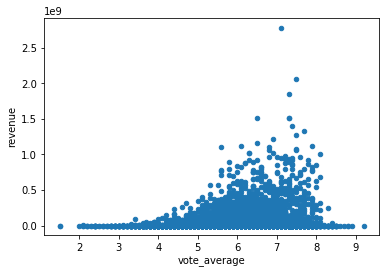

In [11]:
df.plot(x='vote_average', y='revenue', kind='scatter')

#### The graph is skewed to right. It means there is a relationship between the popularity of the film and the voting average, the movies that had most voting average it had most revenue.

In [46]:
dfm=df.groupby('vote_average').budget.mean()

vote_average
1.5    9.500000e+03
2.0    0.000000e+00
2.1    0.000000e+00
2.2    2.166667e+07
2.3    0.000000e+00
2.4    2.000000e+05
2.5    0.000000e+00
2.6    8.333333e+04
2.7    0.000000e+00
2.8    1.685714e+06
2.9    3.722222e+05
3.0    8.905000e+05
3.1    1.061538e+07
3.2    5.111111e+05
3.3    4.024546e+06
3.4    3.565789e+06
3.5    5.488710e+06
3.6    3.768966e+06
3.7    3.710526e+06
3.8    5.737350e+06
3.9    6.148718e+06
4.0    6.986945e+06
4.1    4.399344e+06
4.2    4.442544e+06
4.3    7.843129e+06
4.4    1.134935e+07
4.5    7.054237e+06
4.6    7.833306e+06
4.7    6.625828e+06
4.8    1.010405e+07
           ...     
6.1    1.782392e+07
6.2    1.698771e+07
6.3    1.565354e+07
6.4    1.772909e+07
6.5    1.879036e+07
6.6    1.793447e+07
6.7    1.300482e+07
6.8    1.564098e+07
6.9    1.560172e+07
7.0    1.391469e+07
7.1    1.524169e+07
7.2    1.283384e+07
7.3    2.050337e+07
7.4    1.737588e+07
7.5    1.680222e+07
7.6    2.129716e+07
7.7    1.997306e+07
7.8    1.474640e+07
7.9    

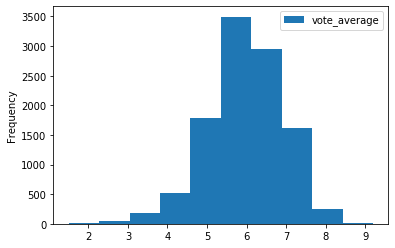

In [15]:
df.plot(x='budget', y='vote_average', kind='hist')

##### The graph is skewed to medile. The movies that had highest budget get  6 voting average. 

###  Question 2: What is the average the profits of movies?

In [53]:
df.groupby('vote_average').popularity.mean()


vote_average
1.5    0.078520
2.0    0.079281
2.1    0.155900
2.2    0.051765
2.3    0.181587
2.4    0.229265
2.5    0.280798
2.6    0.344898
2.7    0.235515
2.8    0.170464
2.9    0.265586
3.0    0.223004
3.1    0.307363
3.2    0.324174
3.3    0.363937
3.4    0.261055
3.5    0.282981
3.6    0.316094
3.7    0.288405
3.8    0.341435
3.9    0.392571
4.0    0.325085
4.1    0.328873
4.2    0.310769
4.3    0.394399
4.4    0.433411
4.5    0.336402
4.6    0.325368
4.7    0.355163
4.8    0.376104
         ...   
6.1    0.631717
6.2    0.680094
6.3    0.713473
6.4    0.666472
6.5    0.806385
6.6    0.747051
6.7    0.638846
6.8    0.677421
6.9    0.759573
7.0    0.758437
7.1    0.997909
7.2    0.891000
7.3    1.112582
7.4    0.957283
7.5    1.050998
7.6    1.595906
7.7    1.491105
7.8    1.500604
7.9    2.031253
8.0    2.033001
8.1    2.423125
8.2    0.928139
8.3    0.706443
8.4    0.814686
8.5    0.241634
8.6    0.067753
8.7    0.212010
8.8    0.175912
8.9    0.114264
9.2    0.006925
Name: popul

In [27]:
df.revenue.mean()

39826896.07685228

So the movies having profit of 40 million and more have an average budget which ia positive relationship.

In [28]:
df.runtime.mean()

102.07179015186378

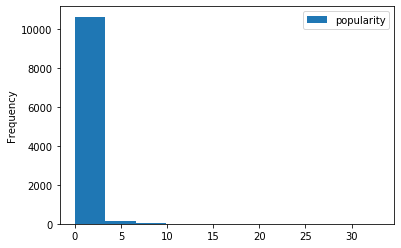

In [26]:
df.plot(x='popularity', y='vote_average', kind='hist' , alpha=0.5, bins=50)

#### The graph is skewed to right. It means there is a relationship between the popularity of the film and the voting average, the movies that had most voting average it had most revenue

<a id='conclusions'></a>
## Conclusions

The criteria of Movie to be successful:
1. Budget must be around 40 million
2. Average duration of the movie around to one hour.




In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])